# Problem Statement
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.
In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

# What should I expect the data format to be?
Each sample in the train and test set has the following information:

The text of a tweet

A keyword from that tweet (although this may be blank)
The location the tweet was sent from (may also be blank)

# What am I predicting?
Predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

# Columns
id - a unique identifier for each tweet
text - the text of the tweet
location - the location the tweet was sent from (may be blank)
keyword - a particular keyword from the tweet (may be blank)
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the train and test datasets

In [2]:
train_data = pd.read_csv(r'C:\Users\jyo14\Downloads\nlp-getting-started\train.csv')

In [3]:
test_data = pd.read_csv(r'C:\Users\jyo14\Downloads\nlp-getting-started\test.csv')

# Basic Analysis on train and test data

In [4]:
print(train_data.shape)
print(test_data.shape)

(7613, 5)
(3263, 4)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
print(train_data.size)
print(test_data.size)

38065
13052


In [8]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [9]:
test_data.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

# Cleaning the train and test datasets

In [10]:
print('Percentage of missing values in train_data\n',train_data.isnull().sum()/len(train_data)*100)

Percentage of missing values in train_data
 id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


In [11]:
print('Percentage of missing values in test_data\n',test_data.isnull().sum()/len(test_data)*100)

Percentage of missing values in test_data
 id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64


In [12]:
train_data.fillna('0',inplace=True)
test_data.fillna('0',inplace=True)

# Exploratory Data Analysis

In [13]:
train_data['target'].unique()

array([1, 0], dtype=int64)

In [14]:
x = train_data.target.value_counts()
x

target
0    4342
1    3271
Name: count, dtype: int64

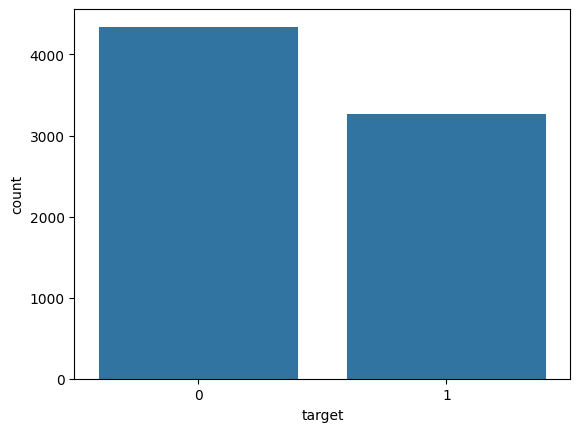

In [15]:
sns.barplot(x=x.index,y=x)
plt.show()

# Text Preprocessing

In [16]:
import re,string
import nltk
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [17]:
nltk.download('all')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[

[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\jyo14\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_d

# Cleaning the 'text' column

In [18]:
# Defining a function to clean the text column
def clean(text):
    text = text.lower() #lowercase text
    text = re.sub('[^A-Za-z]+', ' ', str(text)) #removing the special characters and numeric values
    text = re.sub('\s+', ' ', text)  #remove extra space and tabs
    text = re.compile('<.*?>').sub('', text) #removing html tags
    return text

In [19]:
train_data['cleaned_text'] = train_data['text'].apply(clean)
train_data['cleaned_text'].head(2)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
Name: cleaned_text, dtype: object

In [20]:
test_data['cleaned_text'] = test_data['text'].apply(clean)
test_data['cleaned_text'].head(2)

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
Name: cleaned_text, dtype: object

# Removal of stopwords

In [21]:
def stopword(string):
    a = [i for i in string.split() if i not in stopwords.words('english')]
    return " ".join(a)

In [22]:
train_data['cleaned_text'] = train_data['cleaned_text'].apply(stopword)
train_data.head(2)

,id,keyword,location,text,target,cleaned_text
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,0,0,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada


In [23]:
test_data['cleaned_text'] = test_data['cleaned_text'].apply(stopword)
test_data.head(2)

,id,keyword,location,text,cleaned_text
0,0,0,0,Just happened a terrible car crash,happened terrible car crash
1,2,0,0,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...


# Stemming

In [24]:
snow = SnowballStemmer('english')
def stemming(string):
    a = [snow.stem(i) for i in word_tokenize(string)]
    return " ".join(a)

In [25]:
train_data['cleaned_text'] = train_data['cleaned_text'].apply(stemming)

In [26]:
train_data.head(2)

,id,keyword,location,text,target,cleaned_text
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,0,0,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada


In [27]:
test_data['cleaned_text'] = test_data['cleaned_text'].apply(stemming)
test_data.head(2)

,id,keyword,location,text,cleaned_text
0,0,0,0,Just happened a terrible car crash,happen terribl car crash
1,2,0,0,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon


# Lemmatization

In [28]:
wl = WordNetLemmatizer()

In [29]:
def pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [30]:
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a=[wl.lemmatize(tag[0], pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)

In [31]:
train_data['cleaned_text'] = train_data['cleaned_text'].apply(lemmatizer)
train_data.head(2)

,id,keyword,location,text,target,cleaned_text
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv u
1,4,0,0,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada


In [32]:
test_data['cleaned_text'] = test_data['cleaned_text'].apply(lemmatizer)
test_data.head(2)

,id,keyword,location,text,cleaned_text
0,0,0,0,Just happened a terrible car crash,happen terribl car crash
1,2,0,0,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon


# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(train_data['cleaned_text'],train_data['target'],train_size=0.7,random_state=1)

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(5329,)
(5329,)
(2284,)
(2284,)


# Vectorization - TF - IDF on Train dataset

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

In [37]:
# converting xtrain to vector - Fit and transform 
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
# converting xtest to vector -  transform
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [38]:
print(xtrain_tfidf)

  (0, 2385)	0.3201589187694678
  (0, 1294)	0.23860759488909747
  (0, 13709)	0.3010831114196469
  (0, 9813)	0.43532821068189426
  (0, 2529)	0.40137817666117237
  (0, 2175)	0.2534391378573235
  (0, 12489)	0.3815186798608426
  (0, 4801)	0.43532821068189426
  (1, 9494)	0.2848417588369559
  (1, 4076)	0.29845725817353264
  (1, 2134)	0.055364758469361994
  (1, 5492)	0.05598516286175612
  (1, 13295)	0.16239850942898995
  (1, 7911)	0.27518140832026644
  (1, 7120)	0.13361422044852672
  (1, 10371)	0.24795040964711293
  (1, 7294)	0.21364340861344144
  (1, 1554)	0.21793604724048923
  (1, 373)	0.2837183836968022
  (1, 6179)	0.5353765166402403
  (1, 818)	0.17416771126742697
  (1, 4133)	0.14031145462771794
  (1, 2490)	0.25190555846700025
  (1, 12147)	0.2615659089836897
  (2, 5369)	0.4502597234624282
  :	:
  (5326, 2134)	0.08044573805136646
  (5326, 5492)	0.08134719397055147
  (5327, 1805)	0.46739688246193833
  (5327, 6559)	0.4460744258327268
  (5327, 295)	0.39449492172796047
  (5327, 9211)	0.382760327

In [39]:
print(xtest_tfidf)

  (0, 13164)	0.4155050625448192
  (0, 11079)	0.2895810615193906
  (0, 10997)	0.3221136827419098
  (0, 7889)	0.29445589419373436
  (0, 7497)	0.5406853944032025
  (0, 5492)	0.08690003342857652
  (0, 3581)	0.2516232889816678
  (0, 2982)	0.4271359117236623
  (0, 2134)	0.08593704324184771
  (1, 12301)	0.30345536629177633
  (1, 11518)	0.4308040299573599
  (1, 9701)	0.4915647841523553
  (1, 8973)	0.4222784457612003
  (1, 4020)	0.311369819165855
  (1, 2444)	0.45322901648129094
  (2, 12697)	0.3290610474559805
  (2, 5231)	0.34900790352553807
  (2, 3731)	0.8774464714863703
  (3, 13548)	0.25285238294562745
  (3, 11181)	0.2624225238432362
  (3, 9852)	0.33560874432697435
  (3, 9600)	0.3051411252002046
  (3, 7383)	0.35039854401111353
  (3, 4862)	0.2548062816406026
  (3, 3932)	0.24266343103448534
  :	:
  (2281, 8972)	0.3444966478118752
  (2281, 7054)	0.2316282301728353
  (2281, 5747)	0.252529935323482
  (2281, 4133)	0.18479788117904528
  (2281, 4124)	0.3265642884384372
  (2281, 1514)	0.216257594889172

# Model Building On Train Data

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,cohen_kappa_score

In [41]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain_tfidf,ytrain)
    hard = m.predict(xtest_tfidf)
    soft = m.predict_proba(xtest_tfidf)[:,1]
    print('classification_report\n',classification_report(ytest,hard))
    inp = input('Do you want to save the model in score card? Y/N')
    if inp.lower() == 'y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model':mod,
                                 'Accuracy':acc,
                                 'Precision':pre,
                                 'Recall':rec,
                                 'F1 score':f1,
                                 'Cohen-Kappa':ck})
    else:
        return 


# 1. Logistic Regression

In [42]:
lr = LogisticRegression()

In [43]:
model_validation(lr,xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1326
           1       0.80      0.70      0.74       958

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.80      2284

Do you want to save the model in score card? Y/Ny


# 2. Decision Tree Classifier

In [44]:
model_validation(DecisionTreeClassifier(random_state=10),xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      1326
           1       0.66      0.67      0.67       958

    accuracy                           0.72      2284
   macro avg       0.71      0.71      0.71      2284
weighted avg       0.72      0.72      0.72      2284

Do you want to save the model in score card? Y/Ny


In [45]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.799037,0.798802,0.696242,0.744004,0.579877
1,DecisionTreeClassifier(random_state=10),0.718476,0.661538,0.673278,0.667356,0.423366


# 3. Random Forest Classifier

In [46]:
r = RandomForestClassifier()

In [47]:
model_validation(r,xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      1326
           1       0.86      0.63      0.73       958

    accuracy                           0.80      2284
   macro avg       0.82      0.78      0.78      2284
weighted avg       0.81      0.80      0.79      2284

Do you want to save the model in score card? Y/Ny


In [48]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.799037,0.798802,0.696242,0.744004,0.579877
1,DecisionTreeClassifier(random_state=10),0.718476,0.661538,0.673278,0.667356,0.423366
2,RandomForestClassifier(),0.800788,0.859800,0.627349,0.725407,0.575014


# 4. Gradient Boosting Classifier

In [49]:
model_validation(GradientBoostingClassifier(random_state=10),xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      1326
           1       0.83      0.55      0.66       958

    accuracy                           0.76      2284
   macro avg       0.79      0.73      0.74      2284
weighted avg       0.78      0.76      0.75      2284

Do you want to save the model in score card? Y/Ny


In [50]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.799037,0.798802,0.696242,0.744004,0.579877
1,DecisionTreeClassifier(random_state=10),0.718476,0.661538,0.673278,0.667356,0.423366
2,RandomForestClassifier(),0.800788,0.859800,0.627349,0.725407,0.575014
3,GradientBoostingClassifier(random_state=10),0.764886,0.833597,0.549061,0.662052,0.493237


# 5. ADA Boost Classifier

In [51]:
model_validation(AdaBoostClassifier(random_state=10),xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.73      0.89      0.80      1326
           1       0.78      0.54      0.64       958

    accuracy                           0.74      2284
   macro avg       0.76      0.72      0.72      2284
weighted avg       0.75      0.74      0.73      2284

Do you want to save the model in score card? Y/Ny


In [52]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.799037,0.798802,0.696242,0.744004,0.579877
1,DecisionTreeClassifier(random_state=10),0.718476,0.661538,0.673278,0.667356,0.423366
2,RandomForestClassifier(),0.800788,0.859800,0.627349,0.725407,0.575014
3,GradientBoostingClassifier(random_state=10),0.764886,0.833597,0.549061,0.662052,0.493237
4,AdaBoostClassifier(random_state=10),0.744308,0.780781,0.542797,0.640394,0.451801


# 6. XGBoost Classifier

In [53]:
model_validation(XGBClassifier(random_state=10),xtrain,ytrain,xtest,ytest)

classification_report
               precision    recall  f1-score   support

           0       0.76      0.90      0.82      1326
           1       0.81      0.60      0.69       958

    accuracy                           0.77      2284
   macro avg       0.78      0.75      0.76      2284
weighted avg       0.78      0.77      0.77      2284

Do you want to save the model in score card? Y/Ny


In [54]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.799037,0.798802,0.696242,0.744004,0.579877
1,DecisionTreeClassifier(random_state=10),0.718476,0.661538,0.673278,0.667356,0.423366
2,RandomForestClassifier(),0.800788,0.859800,0.627349,0.725407,0.575014
3,GradientBoostingClassifier(random_state=10),0.764886,0.833597,0.549061,0.662052,0.493237
4,AdaBoostClassifier(random_state=10),0.744308,0.780781,0.542797,0.640394,0.451801
5,"XGBClassifier(base_score=None, booster=None, c...",0.773205,0.808989,0.601253,0.689820,0.517114


# Prediction On Test Dataset

In [55]:
test_df = test_data['cleaned_text']

In [56]:
x = test_data.id
x

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [57]:
test_tfidf = tfidf_vectorizer.transform(test_df)
print(test_tfidf)

  (0, 12191)	0.6521655209619445
  (0, 5081)	0.48842361048436417
  (0, 2427)	0.3928522265303874
  (0, 1707)	0.42636796092104623
  (1, 11694)	0.37345919144838585
  (1, 10801)	0.42681323351481
  (1, 5172)	0.3883918337046883
  (1, 3803)	0.34720629991314234
  (1, 3386)	0.3580395123229492
  (1, 2949)	0.4045496361775551
  (1, 2026)	0.3392721095457708
  (2, 11781)	0.2957503267204998
  (2, 11595)	0.3071641330206243
  (2, 10896)	0.26926462540291524
  (2, 9558)	0.3772860562895655
  (2, 8578)	0.3494670733718549
  (2, 4274)	0.27435860896426034
  (2, 4192)	0.3772860562895655
  (2, 4133)	0.19775822705468693
  (2, 1669)	0.3444805322332015
  (2, 86)	0.3252905308437229
  (3, 13735)	0.4128180159667141
  (3, 11587)	0.6449156533982863
  (3, 7112)	0.4415021449320308
  (3, 483)	0.4676974895331207
  :	:
  (3259, 2026)	0.22262684940984226
  (3259, 1303)	0.17592889832851097
  (3259, 573)	0.2372359917244236
  (3259, 373)	0.16471229354380695
  (3260, 7140)	0.49060755800251743
  (3260, 5492)	0.12936095918880197
  

In [58]:
test_pred = r.predict(test_tfidf)
test_pred = pd.DataFrame(test_pred,columns = ['target'])
test_pred

,target
0,0
1,1
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [59]:
submission_df = pd.concat([x,test_pred],axis=1)
submission_df

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


# Submission File

In [60]:
submission_df.to_csv('submission.csv',index=False)

In [61]:
a = submission_df.target.value_counts()
a

target
0    2235
1    1028
Name: count, dtype: int64

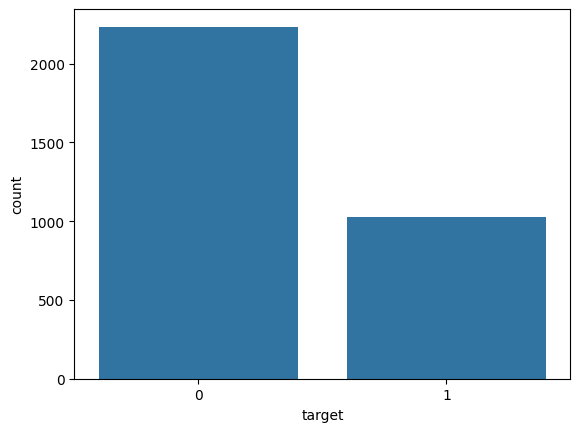

In [62]:
sns.barplot(x=a.index,y=a)
plt.show()